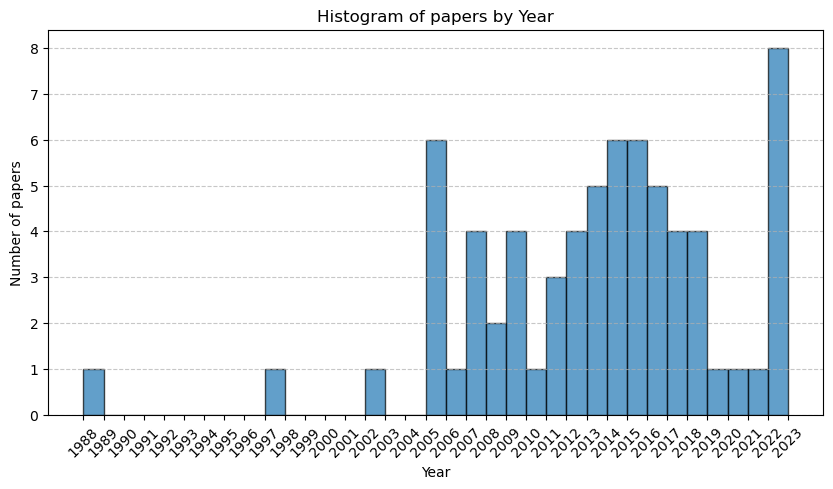

Histogram saved as /Users/scottliu/Desktop/histogram.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
file_path = "/Users/scottliu/Desktop/HAL review paper.xlsx"
sheet_name = "Analysis"
column_name = "Year"

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract the "Year" column
years = df[column_name].dropna().astype(int)  # Remove NaNs and ensure integers

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.hist(years, bins=range(1988, 2024), edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.title("Histogram of papers by Year")
plt.xticks(range(1988, 2024), rotation=45)  # Ensure all years are labeled

# Show grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as an image (PNG format)
image_path = "/Users/scottliu/Desktop/histogram.png"
plt.savefig(image_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Histogram saved as {image_path}")

In [18]:
import pandas as pd
import plotly.graph_objects as go
from collections import Counter

# 原始数据
data = [
    "Type of Study", "Retrospective", "Retrospective/Prospective", "Field Observation", 
    "Field Observation", "Restrospective", "Field Observation", "Field Observation", 
    "Field Observation", "Field Observation", "Field Observation", "Field Observation", 
    "Field Observation", "Field Observation", "Restrospective", "Retrospective", 
    "Conceptual", "Lab Experiment", "Field Observation", "Field Observation", 
    "Lab Experiment", "Field Observation", "Intervention", "Field Observation", 
    "Field Observation", "Field Observation", "Field Observation", "Lab Experiment", 
    "Lab Experiment", "Field Observation", "Field Observation", "Field Observation", 
    "Lab Experiment", "Conceptual", "Retrospective", "Field Observation", 
    "Conceptual", "Conceptual", "Conceptual", "Field Observation", "Field Observation", 
    "Field Observation", "Field Observation", "Field Observation", "Field Observation", 
    "Restrospective", "Field Observation", "Lab Experiment", "retrospective", 
    "Field Observation", "Intervention", "Field Observation", "Field Observation", 
    "Field Observation", "Retrospective", "Retrospective", "Retrospective", 
    "Field Observation", "Field Observation", "Intervention", "Retrospective", 
    "Retrospective", "Lab Experiment", "Lab Experiment", "Field Observation", 
    "Lab Experiment, Field Observatioin", "Lab Experiment", "Longitudinal", 
    "Retrospective"
]

# 数据清洗和标准化
def clean_category(category):
    category = category.strip().title()
    # 修正常见拼写错误
    if "Restrospective" in category:
        return "Retrospective"
    if "Observatioin" in category:
        return "Field Observation"
    if "Lab Experiment, Field Observation" in category:
        return "Mixed Methods"
    return category

# 过滤掉标题行和空值
filtered_data = [clean_category(c) for c in data if c.strip() != "Type of Study" and c.strip() != ""]

# 统计各种研究类型的频率
category_counter = Counter(filtered_data)

# 准备桑基图数据
labels = list(category_counter.keys())
source = [0] * len(labels)  # 所有源节点都是"类型研究"
target = list(range(1, len(labels) + 1))
value = list(category_counter.values())

# 添加汇总节点
all_labels = ["类型研究"] + labels

# 创建桑基图
fig = go.Figure(go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels,
        hovertemplate='%{label}<br>数量: %{value}<extra></extra>',
        color=["#1f77b4"] + ["#ff7f0e"] * len(labels)
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        hovertemplate='从 %{source.label} 到 %{target.label}<br>数量: %{value}<extra></extra>',
        line=dict(color="rgba(0,0,0,0.1)", width=0.5),
        color="rgba(100, 100, 100, 0.4)"
    )
))

# 设置图表布局
fig.update_layout(
    title=dict(
        text="研究类型分布 - 桑基图",
        x=0.5,
        font=dict(size=24, color="#333")
    ),
    font=dict(size=14, color="#555"),
    plot_bgcolor="white",
    height=600,
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False)
)

# 保存为HTML文件
fig.write_html("study_types_alluvial.html")

print("桑基图已保存为 'study_types_alluvial.html'，请在浏览器中打开查看")

桑基图已保存为 'study_types_alluvial.html'，请在浏览器中打开查看


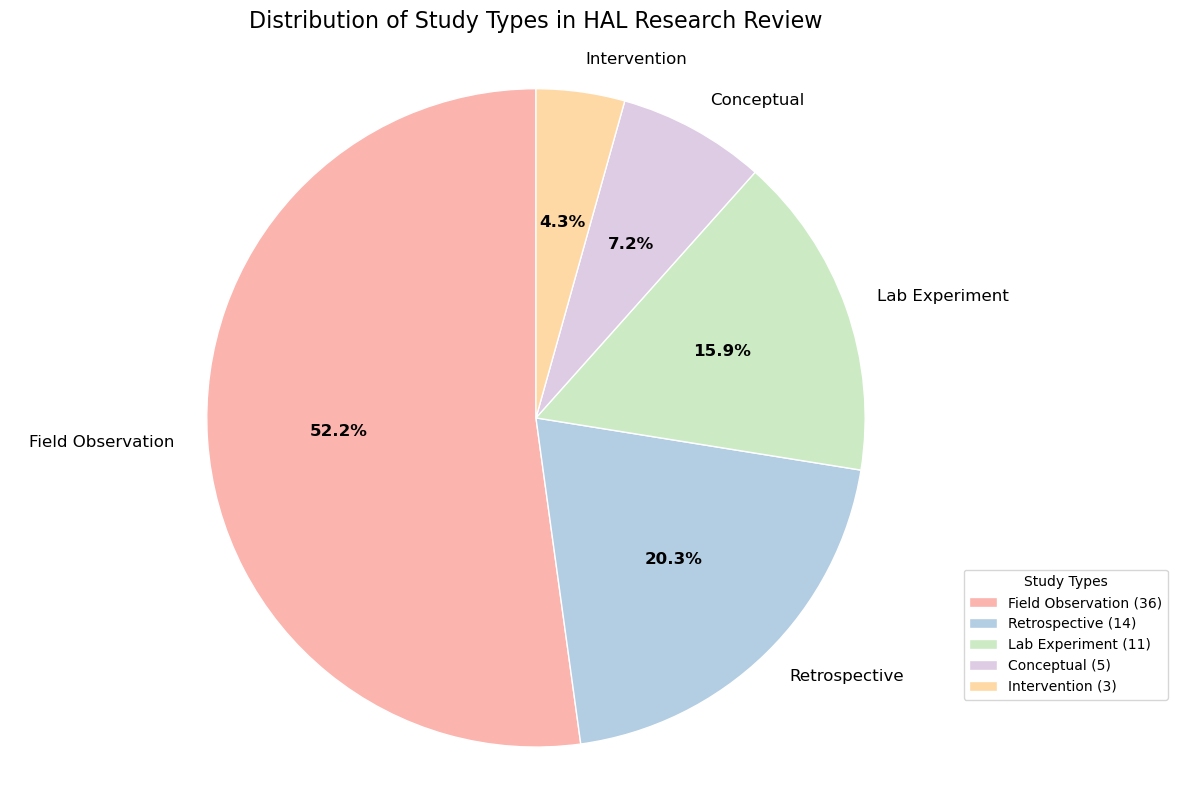

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
# Set a default font that works across systems
mpl.rcParams['font.family'] = 'DejaVu Sans'  # Use a common universal font
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica', 'Verdana']  # Fallback options


# Load the Excel file
file_path = "/Users/scottliu/Desktop/HAL review paper.xlsx"

# Read the "Analysis" sheet from the Excel file
df = pd.read_excel(file_path, sheet_name='Analysis')

# Generate the pie chart
plt.figure(figsize=(12, 8))

# Process the data
study_counts = df['Type of Study'].value_counts()
colors = plt.cm.Pastel1(range(len(study_counts)))  # Color palette

# Create pie chart
wedges, texts, autotexts = plt.pie(
    study_counts,
    labels=study_counts.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'w', 'linewidth': 1},
    textprops={'fontsize': 12}
)

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')
plt.title('Distribution of Study Types in HAL Research Review', fontsize=16, pad=20)

# Add legend with counts
legend_labels = [f'{label} ({count})' for label, count in zip(study_counts.index, study_counts)]
plt.legend(wedges, legend_labels, title='Study Types', loc='best', bbox_to_anchor=(0.9, 0.3))

# Improve text visibility
plt.setp(autotexts, size=12, weight='bold', color='black')

# Display the plot
plt.tight_layout()
plt.savefig('/Users/scottliu/Desktop/study_type_pie_chart.png', dpi=300)  # Save high-res image
plt.show()

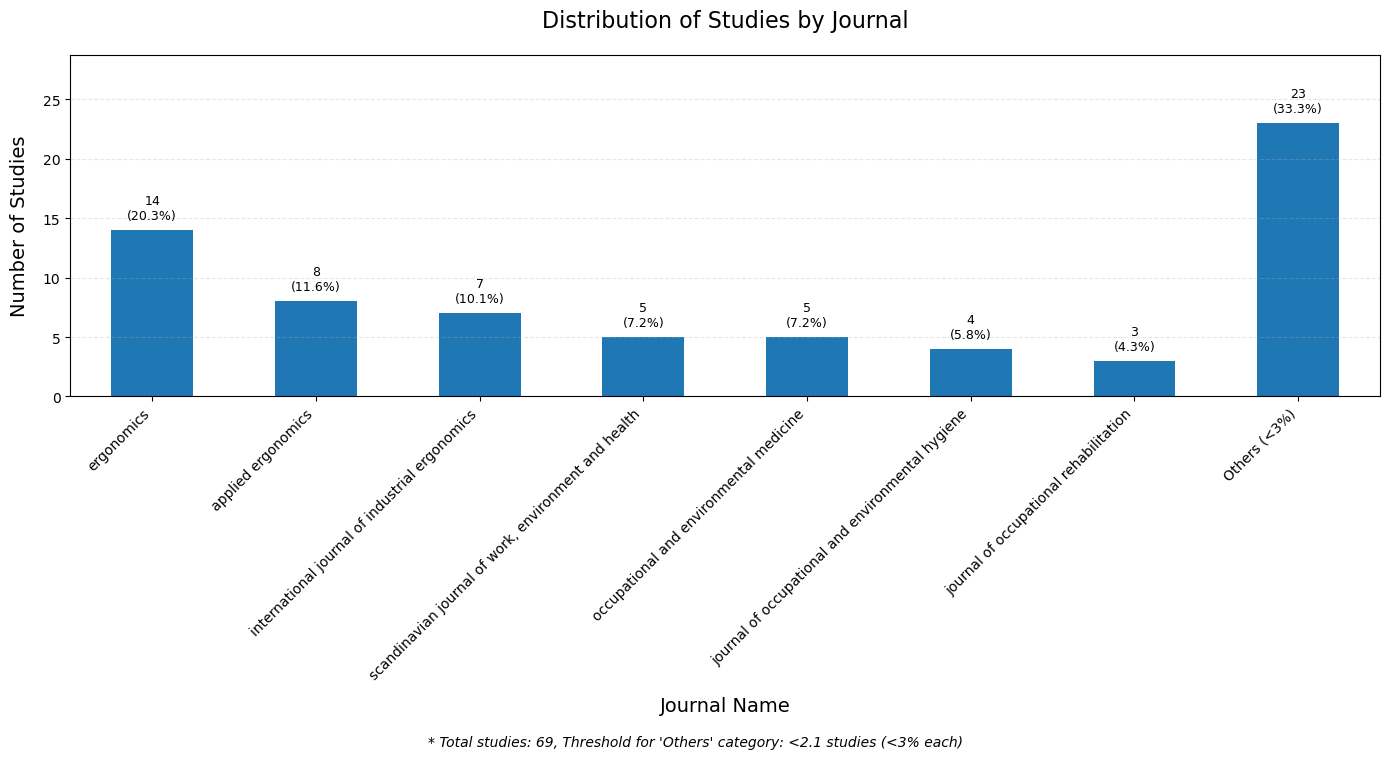

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = "/Users/scottliu/Desktop/HAL review paper.xlsx"
df = pd.read_excel(file_path, sheet_name='Analysis')

# Create a copy and handle missing data
journal_data = df['Journal'].copy().fillna('Unknown')

# Calculate threshold
total = len(journal_data)
threshold = 0.03 * total

# Get journal counts and apply threshold filter
journal_counts = journal_data.value_counts()
others_mask = journal_counts < threshold
others_count = journal_counts[others_mask].sum()

# Create groups for visualization
top_journals = journal_counts[~others_mask]
grouped_name = "Others (<3%)"

# Create the new grouped series
journals_grouped = top_journals.copy()
if others_count > 0:
    journals_grouped = pd.concat([journals_grouped, pd.Series([others_count], index=[grouped_name])])

# Sort in descending order while keeping 'Others' last
journals_grouped = journals_grouped.sort_values(ascending=False)
if others_count > 0:
    others_index = journals_grouped.index.get_loc(grouped_name)
    if others_index < len(journals_grouped) - 1:
        journals_grouped = pd.concat([
            journals_grouped.drop(grouped_name),
            pd.Series([others_count], index=[grouped_name])
        ])

# Create bar chart
plt.figure(figsize=(14, 8))
ax = journals_grouped.plot(kind='bar', color='#1f77b4')

# Add labels with counts and percentages
total_studies = journals_grouped.sum()
for i, bar in enumerate(ax.patches):
    count = bar.get_height()
    percentage = 100 * count / total_studies
    ax.text(bar.get_x() + bar.get_width()/2, 
            bar.get_height() + (0.01*total_studies), 
            f"{count}\n({percentage:.1f}%)", 
            ha='center', 
            va='bottom',
            fontsize=9)

# Formatting
plt.title('Distribution of Studies by Journal', fontsize=16, pad=20)
plt.xlabel('Journal Name', fontsize=14, labelpad=10)
plt.ylabel('Number of Studies', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, journals_grouped.max() * 1.25)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add data source and threshold info
plt.figtext(0.5, 0.01, 
            f"* Total studies: {total}, Threshold for 'Others' category: <{threshold:.1f} studies (<3% each)",
            ha="center", 
            fontsize=10, 
            style='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('/Users/scottliu/Desktop/Journal_pie_chart.png', dpi=300)  # Save high-res image
plt.show()

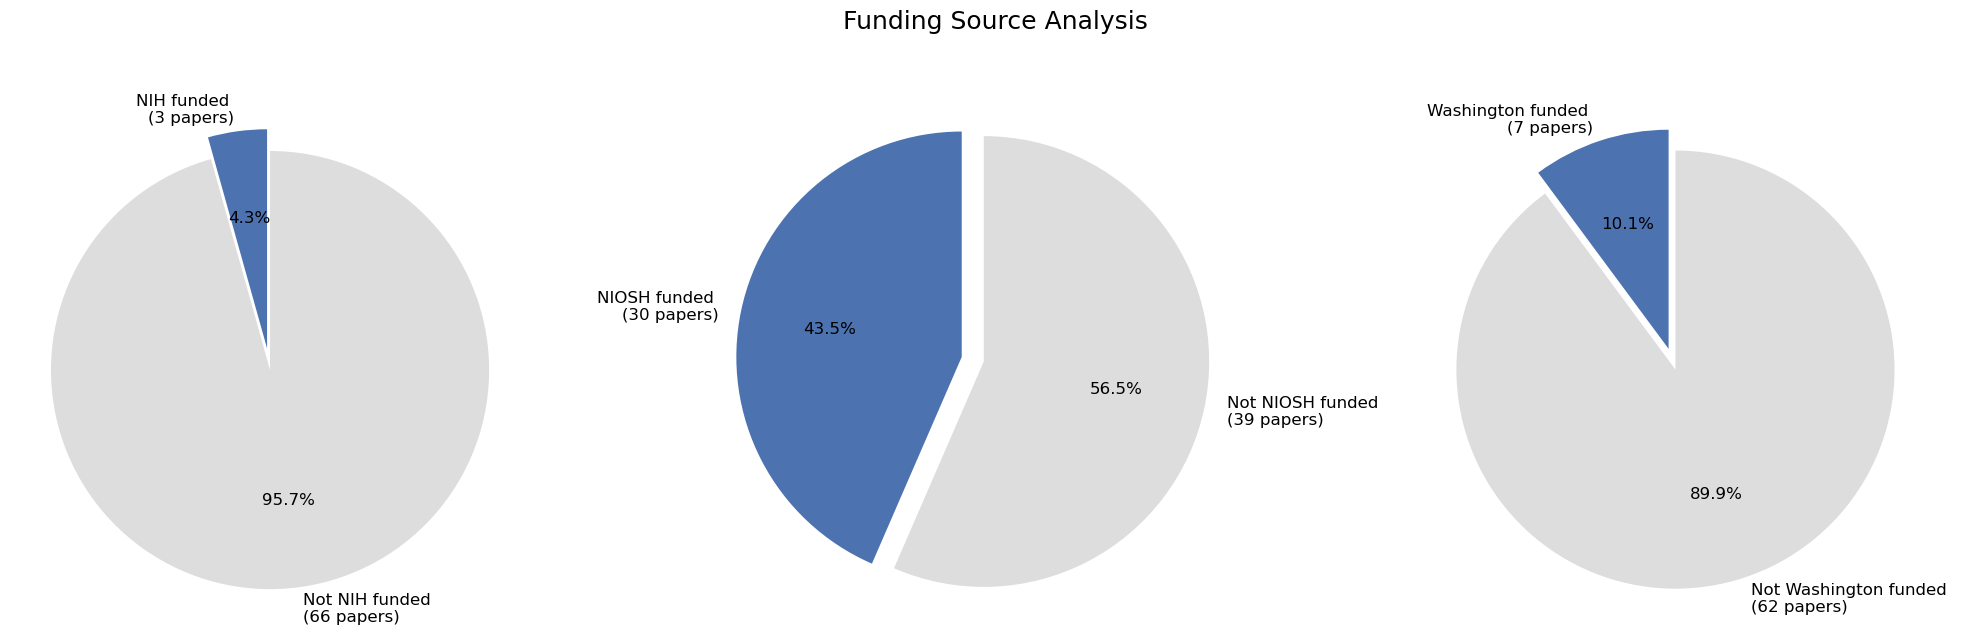

Analysis completed. Charts saved to desktop.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "/Users/scottliu/Desktop/HAL review paper.xlsx"
df = pd.read_excel(file_path, sheet_name='Analysis')

# Create a copy and handle missing data
journal_data = df['Funding Source'].copy().fillna('Unknown')

# Convert to lowercase for case-insensitive matching
journal_data_lower = journal_data.str.lower()

# Create detection columns for each keyword
keywords = {
    'NIH': 'nih',
    'NIOSH': 'niosh',
    'Washington': 'washington'
}

fig, axes = plt.subplots(1, 3, figsize=(20, 6), facecolor='white')
fig.suptitle('Funding Source Analysis', fontsize=18, y=1.05)

for i, (display_name, search_term) in enumerate(keywords.items()):
    # Create boolean mask for keyword presence
    contains_keyword = journal_data_lower.str.contains(search_term)
    count = contains_keyword.sum()
    total = len(journal_data)
    
    # Prepare data for pie chart
    sizes = [count, total - count]
    labels = [f'{display_name} funded \n({count} papers)', 
              f'Not {display_name} funded \n({total-count} papers)']
    colors = ['#4C72B0', '#DDDDDD']
    explode = (0.1, 0)
    
    # Create pie chart
    axes[i].pie(
        sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        shadow=False,
        startangle=90,
        textprops={'fontsize': 12}
    )
    # axes[i].set_title(f'"{display_name}" funded', fontsize=14)
    axes[i].axis('equal')

plt.tight_layout()
plt.savefig('/Users/scottliu/Desktop/funding_source_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Add analysis metrics to DataFrame for inspection
for display_name, search_term in keywords.items():
    df[f'Contains {display_name}'] = journal_data_lower.str.contains(search_term)

# Optional: Save the enhanced DataFrame
# df.to_excel('/Users/scottliu/Desktop/Enhanced_HAL_analysis.xlsx', index=False)

print("Analysis completed. Charts saved to desktop.")

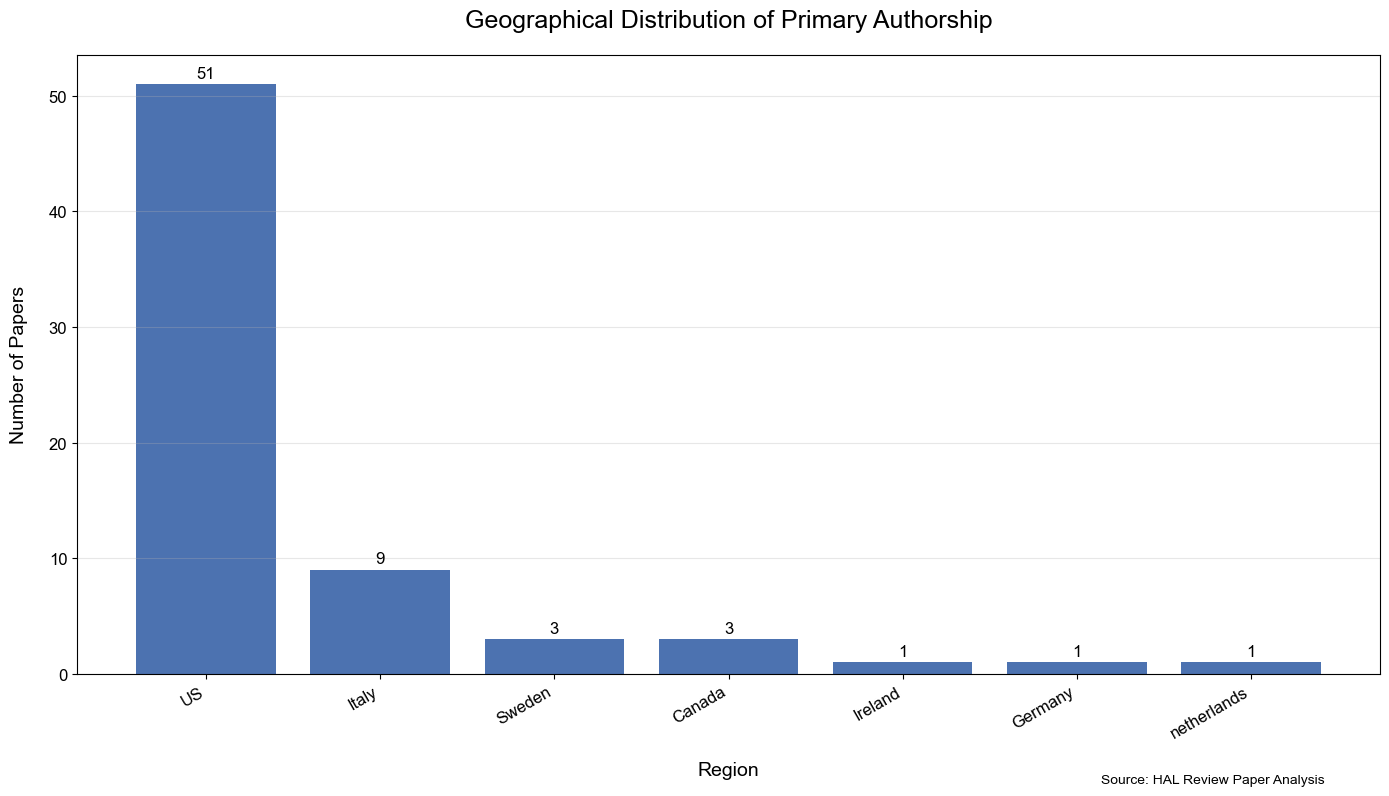

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager

# Set a common sans-serif font that works across systems
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica', 'Verdana']

# Load the data
file_path = "/Users/scottliu/Desktop/HAL review paper.xlsx"
df = pd.read_excel(file_path, sheet_name='Analysis')

# Create a copy and handle missing data
author_regions = df['Region of majority author'].copy().fillna('Unknown')

# Calculate value counts
region_counts = author_regions.value_counts()

# Customize colors for each region
region_colors = {
    'North America': '#4C72B0',  # Professional blue
    'Europe': '#55A868',       # Muted green
    'Asia': '#C44E52',         # Complementary red
    'Oceania': '#8172B3',      # Soft purple
    'South America': '#CCB974', # Gold-like
    'Unknown': '#999999'       # Gray for unknown
}

# Generate colors list for each bar
colors = [region_colors.get(region, '#4C72B0') for region in region_counts.index]

# Create and customize the plot
plt.figure(figsize=(14, 8))
bars = plt.bar(region_counts.index, region_counts.values, color=colors)
plt.title('Geographical Distribution of Primary Authorship', fontsize=18, pad=20)
plt.xlabel('Region', fontsize=14, labelpad=15)
plt.ylabel('Number of Papers', fontsize=14, labelpad=15)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add data labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., 
             height + 0.3, 
             f'{int(height)}', 
             ha='center', 
             va='bottom',
             fontsize=12)

# Add a footer source line
plt.figtext(0.95, 0.01, "Source: HAL Review Paper Analysis", 
            ha="right", va="bottom", 
            fontsize=10, color='black')

# Make layout tight
plt.tight_layout()

# Save and display
plt.savefig('/Users/scottliu/Desktop/author_region_distribution.png', dpi=300, bbox_inches='tight')
plt.show()